# Finite Element Method in 1D

Example of the Finite Element Method (FEM) for the heat equation in 1D:
$$ \dfrac{d^2 T}{d x^2} = -f(x)$$

Presentation of the problem:

Heated rod of length $L$ under a uniform heat source $f(x)=c_0$. Initial temperature $T(0,t)=T_1$ and $T(L,t)=T_2$.

### Analytical calculations

After integrating twice the heat eq. we end up with a polynomial solution of the form:
$$T(x) = - \dfrac{c_0}{2}x^2 + c_1 x + c_2,$$
where $c_1=c_0L/2 + (T_2-T_1)/L$ and $c_2 = T_1$.

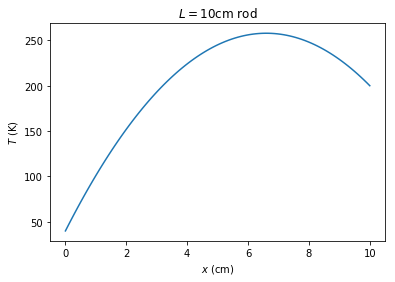

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# parameters for the rod
L  = 10  # cm
T1 = 40  # K 
T2 = 200 # K
c0 = 10

c1 = 0.5*c0*L + (T2-T1)/L
c2 = T1

x = np.linspace(0,L,100)
T = -0.5*c0*x**2 + c1*x + c2

plt.plot(x,T)

plt.xlabel('$x$ (cm)')
plt.ylabel('$T$ (K)')
s1 = '$L = $' + repr(L) + 'cm rod' 
plt.title(s1)
plt.show()

### FEM using the Method of Weighted Residuals (MWR) 

We use interpolating functions $N_i$ as weighting functions (Galerkin's method). As the problem is approximated the heat equation has a small residual $R$:
$$R = \dfrac{d^2 T}{dx^2} + f(x)$$
Hence, we try to find a minimum for the residual $R$ in the solution domain $D$ according to:
$$\int_D RN_j dD = 0$$
where $j=1,2,...,m$ being $m$ the total number of nodes. For our 10cm rod we choose 4 elements of 2.5cm and thus, we have 5 nodes.

The approximated equation for the temperature is
$$T(x) \sim N_i T_i + N_f T_f$$
where,
$$N_i = \dfrac{x_f - x}{x_f - x_i}$$

$$N_f = \dfrac{x - x_i}{x_f - x_i}.$$

The element equations are:
$$\dfrac{1}{x_f-x_i} \begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix} 
\begin{bmatrix}
T_i  \\
T_f 
\end{bmatrix} = 
\begin{bmatrix}
-T'_i  \\
T'_f 
\end{bmatrix} + 
\begin{bmatrix}
\int_{x_i}^{x_f} f(x) N_i(x)dx  \\
\int_{x_i}^{x_f} f(x) N_f(x)dx 
\end{bmatrix}
$$
which after assembly (passing from local to global coordinates) become:
$$\begin{bmatrix}
\dfrac{1}{x_1-x_2}   & -\dfrac{1}{x_1-x_2} &  0 &  0 &  0\\
-\dfrac{1}{x_1-x_2}  &  \dfrac{1}{x_1-x_2}+\dfrac{1}{x_2-x_3}  & -\dfrac{1}{x_2-x_3} &  0 &  0\\
0  & -\dfrac{1}{x_2-x_3} &  \dfrac{1}{x_2-x_3}+\dfrac{1}{x_3-x_4} & -\dfrac{1}{x_3-x_4} &  0\\
0  &  0 & -\dfrac{1}{x_3-x_4} &  \dfrac{1}{x_3-x_4}+\dfrac{1}{x_4-x_5} & -\dfrac{1}{x_4-x_5}\\
0  &  0 &  0 & -\dfrac{1}{x_4-x_5} &  \dfrac{1}{x_4-x_5}
\end{bmatrix} 
\begin{bmatrix}
T_1  \\
T_2  \\
T_3  \\
T_4  \\
T_5  
\end{bmatrix} = 
\begin{bmatrix}
-T'_1 + \int_{x_1}^{x_2} f(x)N_1(x) dx  \\
\int_{x_1}^{x_2} f(x)N_2(x) dx + \int_{x_2}^{x_3} f(x)N_2(x) dx + (T'_2 - T'_2) \\
\int_{x_2}^{x_3} f(x)N_3(x) dx + \int_{x_3}^{x_4} f(x)N_3(x) dx + (T'_3 - T'_3)\\
\int_{x_3}^{x_4} f(x)N_4(x) dx + \int_{x_4}^{x_5} f(x)N_4(x) dx + (T'_4 - T'_4)\\
T'_5 + \int_{x_4}^{x_5} f(x)N_5(x) dx  \\
\end{bmatrix} 
$$
Finally, plugging numbers:
$$0.4\begin{bmatrix}
1  & -1 &  0 &  0 &  0\\
-1 &  2 & -1 &  0 &  0\\
0  & -1 &  2 & -1 &  0\\
0  &  0 & -1 &  2 & -1\\
0  &  0 &  0 & -1 &  1
\end{bmatrix} 
\begin{bmatrix}
T_1  \\
T_2  \\
T_3  \\
T_4  \\
T_5  
\end{bmatrix} = 
\begin{bmatrix}
-T'_1 + 12.5  \\
25 \\
25\\
25\\
T'_5 + 12.5  \\
\end{bmatrix} 
$$
Here $T_1=40$K and $T_5=200$K but $T'_1$ and $T'_5$ are unknown. By solving the (new) systems of equations which includes $T'_1$ and $T'_5$ we have the solution approximated with the FEM:
$$\begin{bmatrix}
1  & -0.4 &  0 &  0 &  0\\
0 &  0.8 & -0.4 &  0 &  0\\
0  & -0.4 & 0.8 & -0.4 &  0\\
0  &  0 & -0.4 &  0.8 & 0\\
0  &  0 &  0 & -0.4 & -1
\end{bmatrix} 
\begin{bmatrix}
T'_1  \\
T_2  \\
T_3  \\
T_4  \\
T'_5  
\end{bmatrix} = 
\begin{bmatrix}
-0.4T_1 + 12.5  \\
0.4T_1+25 \\
25\\
0.4T_5+25\\
-0.4T_5 + 12.5  \\
\end{bmatrix} 
$$

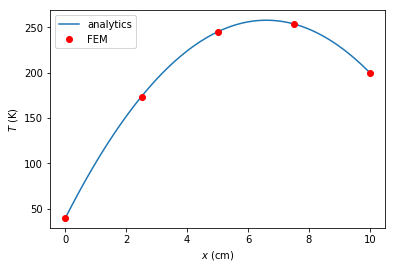

In [71]:
# parameters for the rod
L  = 10  # cm
Ti = 40  # K 
Tf = 200 # K
c0 = 10

# analytics
c1 = 0.5*c0*L + (Tf-Ti)/L
c2 = Ti

x = np.linspace(0,L,100)
T = -0.5*c0*x**2 + c1*x + c2

# FEM
T1=Ti
T5=Tf

xfem = np.linspace(0,L,5) # number of elements

# elements matrix
E    = np.array([[1, -0.4, 0, 0, 0], 
                 [0, 0.8, -0.4, 0, 0],
                 [0, -0.4, 0.8, -0.4, 0], 
                 [0, 0, -0.4, 0.8, 0], 
                 [0, 0, 0, -0.4, -1]])

# solutions matrix
S    = np.array([12.5-0.4*T1,25+0.4*T1,25,25+0.4*T5,12.5-0.4*T5])

Tpfem = np.linalg.solve(E, S)
Lt = len(Tpfem)

Tfem = Tpfem
Tfem[0]   = T1
Tfem[Lt-1]= T5

plt.plot(x,T,label='analytics')
plt.plot(xfem,Tfem,'or',label='FEM')
plt.xlabel('$x$ (cm)')
plt.ylabel('$T$ (K)')
plt.legend()